###Importation des tweets

In [0]:
# Importer les libraries
import pandas as pd
import snscrape.modules.twitter as sntwitter
import itertools

In [0]:
# Création d'une liste pour ajouter des données de tweet
tweets_list2 = []

# Utilisation de TwitterSearchScraper pour récupérer des données et ajouter des tweets à la liste
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('covid vaccine since:2021-10-31 until:2021-11-30').get_items()):
    if i>20000:
        break
    tweets_list2.append([tweet.date, tweet.hashtags,tweet.id,tweet.content, tweet.user.username,tweet.retweetCount])
    

    
# Création d'un dataframe à partir de la liste des tweets
df = pd.DataFrame(tweets_list2, columns=['Datetime','Hashtags','Tweet Id','Text', 'Username','retweetCount'])

In [0]:
df.head()

,Datetime,Hashtags,Tweet Id,Text,Username,retweetCount
0,2021-11-29 23:59:59+00:00,[Fauci],1465470629365403657,What #Fauci has done by financing the creation...,blackhawkinc,5
1,2021-11-29 23:59:59+00:00,None,1465470628954140673,Covid vaccine mandate in Queensland: Annastaci...,dailymail241,0
2,2021-11-29 23:59:59+00:00,None,1465470627603787778,Natural Immunity Works Better Than COVID Vacci...,wrestlerkw7,2
3,2021-11-29 23:59:58+00:00,None,1465470625837993992,Covid vaccine mandate in Queensland: Annastaci...,usmail24,0
4,2021-11-29 23:59:53+00:00,None,1465470602333106185,@bitcharoo96 Yessssss… I’ve got a little cockt...,RominaReilly,0


###Prétraitement des tweets

In [0]:
# Grâce au tweet-preprocessor, on peut supprimer les emojis, les liens, les mentions, les hashtags ...
import preprocessor as p
for i in df.index:
    a=df["Text"][i]
    a=p.clean(a)
    #print(a)
    df["Text"][i]=a

<command-4076559287931233>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text"][i]=a


In [0]:
df.Text

Out[40]: 0        What has done by financing the creation of the...
1        Covid vaccine mandate in Queensland: Annastaci...
2        Natural Immunity Works Better Than COVID Vacci...
3        Covid vaccine mandate in Queensland: Annastaci...
4        Yessssss Ive got a little cocktail of covid va...
                               ...                        
19996    One state had asked for booster for doctors wo...
19997    There is a MYTH among the right-wingers that t...
19998    symptoms are different from usual Covid sympto...
19999    If fauci represents science, then why have mor...
20000    Gqeberha:: YES to vaccines, NPIs, and hospital...
Name: Text, Length: 20001, dtype: object

In [0]:
# Remplacer les majuscules par les minuscules
for i in df.index:
    a=df["Text"][i]
    a=a.replace('\d+', '')
    lower=a.lower()
    #print(lower)
    df["Text"][i]=lower
    
#df['Text'] = df.Text.str.lower()

<command-4076559287931235>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text"][i]=lower


In [0]:
df.Text

Out[42]: 0        what has done by financing the creation of the...
1        covid vaccine mandate in queensland: annastaci...
2        natural immunity works better than covid vacci...
3        covid vaccine mandate in queensland: annastaci...
4        yessssss ive got a little cocktail of covid va...
                               ...                        
19996    one state had asked for booster for doctors wo...
19997    there is a myth among the right-wingers that t...
19998    symptoms are different from usual covid sympto...
19999    if fauci represents science, then why have mor...
20000    gqeberha:: yes to vaccines, npis, and hospital...
Name: Text, Length: 20001, dtype: object

##### NLTK est un puissant package Python qui fournit un ensemble d'algorithmes de langages naturels divers. Il se compose des algorithmes les plus courants tels que la tokenisation (séparation de texte en mots 'tokens'), le stemming (consiste à réduire un mot dans sa forme « racine »), éliminer les stopwords (les mots les fréquents dans la langue comme my, your, ...), ..etc

In [0]:
#Lemmatisation avec NLTK
import nltk
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer

lemmatizer = nltk.stem.WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemmatize_text(text):
    return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]

In [0]:
df.Text

Out[44]: 0        what has done by financing the creation of the...
1        covid vaccine mandate in queensland: annastaci...
2        natural immunity works better than covid vacci...
3        covid vaccine mandate in queensland: annastaci...
4        yessssss ive got a little cocktail of covid va...
                               ...                        
19996    one state had asked for booster for doctors wo...
19997    there is a myth among the right-wingers that t...
19998    symptoms are different from usual covid sympto...
19999    if fauci represents science, then why have mor...
20000    gqeberha:: yes to vaccines, npis, and hospital...
Name: Text, Length: 20001, dtype: object

In [0]:
# Eliminer les stopwords avec ntlk
from nltk.corpus import stopwords
stopWords = set(stopwords.words('french','english'))

def listToString(s): 
    str1 = " " 
    return (str1.join(s))

for i in df.index:
    a=df["Text"][i]
    clean_words = []
    for token in lemmatize_text(a):
        if token not in stopWords:
            clean_words.append(token)
    df["Text"][i]=listToString(clean_words)

<command-4076559287931239>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text"][i]=listToString(clean_words)


In [0]:
df.Text

Out[46]: 0        what ha done by financing the creation of the ...
1        covid vaccine mandate in queensland : annastac...
2        natural immunity work better than covid vaccin...
3        covid vaccine mandate in queensland : annastac...
4        yes ive got a little cocktail of covid vaccine...
                               ...                        
19996    one state had asked for booster for doctor wor...
19997    there is a myth among the right-winger that th...
19998    symptom are different from usual covid symptom...
19999    if fauci represents science , then why have mo...
20000    gqeberha :: yes to vaccine , npis , and hospit...
Name: Text, Length: 20001, dtype: object

In [0]:
# Supprimer les ponctuations
import string
for i in df.index:
    a=df["Text"][i]
    a= a.translate(str.maketrans('', '', string.punctuation))
    #print(a)
    df["Text"][i]=a

<command-4076559287931241>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text"][i]=a


In [0]:
df.Text

Out[48]: 0        what ha done by financing the creation of the ...
1        covid vaccine mandate in queensland  annastaci...
2        natural immunity work better than covid vaccin...
3        covid vaccine mandate in queensland  annastaci...
4        yes ive got a little cocktail of covid vaccine...
                               ...                        
19996    one state had asked for booster for doctor wor...
19997    there is a myth among the rightwinger that the...
19998    symptom are different from usual covid symptom...
19999    if fauci represents science  then why have mor...
20000    gqeberha  yes to vaccine  npis  and hospital r...
Name: Text, Length: 20001, dtype: object

### Analyse de sentiments
##### L'analyse des sentiments est fondamentalement le processus de détermination de l'attitude ou de l'émotion de l'écrivain, c'est-à-dire si elle est positive, négative ou neutre. 

##### La fonction sentiment de textblob renvoie deux propriétés, polarity et subjectivity.

##### La polarité est flottante qui se situe dans la plage de [-1,1] où 1 signifie une déclaration positive et -1 signifie une déclaration négative. Les phrases subjectives font généralement référence à une opinion personnelle, à une émotion ou à un jugement. La subjectivité quantifie la quantité d'opinions personnelles et d'informations factuelles contenues dans le texte. Elle est aussi un flotteur qui se situe dans la plage de [0,1].

In [0]:
# Calculer la polarité et la subjectivité des tweets
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

positive = 0
negative = 0
neutral = 0
polarity = 0

for i in df.index:
    a=df["Text"][i]
    score = SentimentIntensityAnalyzer().polarity_scores(a)
    # Retourner les valeurs de neg, pos et neu
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    if neg > pos:
        negative += 1
    elif pos > neg:
        positive += 1
    elif pos == neg:
        neutral += 1

In [0]:
# Afficher le nombre de tweets postifs, négatifs et neutres
print("Nombre total de tweets ",len(df))
print("Nombre de tweets positifs: ",positive)
print("Nombre de tweets négatifs: ", negative)
print("Nombre de tweets neutres: ",neutral)

Nombre total de tweets  20001
Nombre de tweets positifs:  8104
Nombre de tweets négatifs:  7445
Nombre de tweets neutres:  4452


In [0]:
# Calculer les pourcentages des catégorie des tweets
def percentage(part,whole):
    return 100 * float(part)/float(whole)

positive = percentage(positive,len(df) )
negative = percentage(negative, len(df))
neutral = percentage(neutral, len(df))
polarity = percentage(polarity, len(df))
positive = format(positive, ".1f")
negative = format(negative, ".1f")
neutral = format(neutral, ".1f")

In [0]:
# Représenter ces pourcentages par un graphe circulaire 'pie' de matplotlib
import matplotlib.pyplot as plt
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Résultat de l'analyse de sentiment pour la vaccination" )
plt.axis('equal')
plt.show()

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
<command-4076559287931247> in <module>
      1 # Représenter ces pourcentages par un graphe circulaire 'pie' de matplotlib
      2 import matplotlib.pyplot as plt
----> 3 labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
      4 sizes = [positive, neutral, negative]
      5 colors = ['yellowgreen', 'blue','red']

NameError: name 'positive' is not defined

In [0]:
#Ajouter au dataframe les colonnes polarity, subjectivity et sentiment
df[['polarity', 'subjectivity']] = df["Text"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df["Text"].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"
df.head(10)

,Datetime,Hashtags,Tweet Id,Text,Username,retweetCount,polarity,subjectivity,sentiment
0,2021-11-29 23:59:59+00:00,[Fauci],1465470629365403657,what ha done by financing the creation of the ...,blackhawkinc,5,0.100000,0.250000,positive
1,2021-11-29 23:59:59+00:00,None,1465470628954140673,covid vaccine mandate in queensland annastaci...,dailymail241,0,0.000000,0.000000,negative
2,2021-11-29 23:59:59+00:00,None,1465470627603787778,natural immunity work better than covid vaccin...,wrestlerkw7,2,0.245455,0.451515,positive
3,2021-11-29 23:59:58+00:00,None,1465470625837993992,covid vaccine mandate in queensland annastaci...,usmail24,0,0.000000,0.000000,negative
4,2021-11-29 23:59:53+00:00,None,1465470602333106185,yes ive got a little cocktail of covid vaccine...,RominaReilly,0,-0.187500,0.500000,positive
5,2021-11-29 23:59:51+00:00,"[COVID, CORONAVIRUS]",1465470592606425089,and our child why dont revive covids vaccine ...,CelioRamires,0,0.100000,0.200000,negative
6,2021-11-29 23:59:46+00:00,None,1465470573589385220,exclusive forced to get vaccine to remain lun...,hlwegley,0,-0.366667,0.333333,negative
7,2021-11-29 23:59:44+00:00,None,1465470566580854784,in conversation with the surgeon general the ...,AMWADoctors,3,0.275000,0.700000,neutral
8,2021-11-29 23:59:41+00:00,None,1465470551707688960,obviously im hoping for better vaccine the qu...,brettbutlerisok,0,0.375000,0.472500,positive
9,2021-11-29 23:59:38+00:00,None,1465470541142405120,much more than a dozen anecdotal case do your...,adequatechris,0,0.250000,0.625000,positive


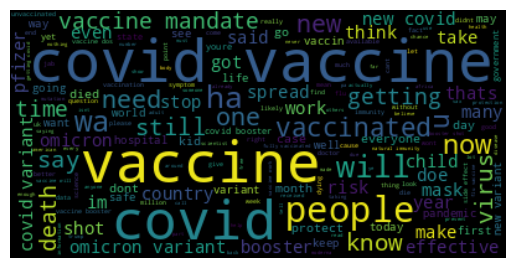

In [0]:
# Visuliser les tweets avec wordcloud qui représente les mots les plus fréquents de note data
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
for i in df.index:
    a+=df["Text"][i]
    
# Créer et générer une image wordcloud
wordcloud = WordCloud().generate(a)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
# Eliminer quelque colonnes
df = df.drop(columns=["Datetime", "Hashtags","Tweet Id","Username","retweetCount"])

In [0]:
df.head()

,Text,polarity,subjectivity,sentiment
0,what ha done by financing the creation of the ...,0.100000,0.250000,positive
1,covid vaccine mandate in queensland annastaci...,0.000000,0.000000,negative
2,natural immunity work better than covid vaccin...,0.245455,0.451515,positive
3,covid vaccine mandate in queensland annastaci...,0.000000,0.000000,negative
4,yes ive got a little cocktail of covid vaccine...,-0.187500,0.500000,positive


### File SparkStreaming
##### Le streaming structuré est construit sur le moteur SparkSQL d'Apache Spark qui s'occupera de l'exécution du flux au fur et à mesure que les données continuent de recevoir. Tout comme les autres moteurs de Spark, il est évolutif et tolérant aux pannes. Le streaming structuré améliore les API Spark DataFrame avec des fonctionnalités de streaming.

In [0]:
# Diviser notre dataframe en 4, avec preseque 5000 tweets dans chacun.
df1 = df.iloc[:5000]
df2 = df.iloc[5000:10000]
df3 = df.iloc[10000:15000]
df4= df.iloc[15000:]
from pyspark.sql import SparkSession
#Créer Session PySpark 
spark = SparkSession.builder \
    .master("local[4]") \
    .appName("Big Data") \
    .getOrCreate()
#Create PySpark DataFrame from Pandas
df1=spark.createDataFrame(df1) 
df2=spark.createDataFrame(df2) 
df3=spark.createDataFrame(df3) 
df4=spark.createDataFrame(df4) 

In [0]:
# Télécharger les dataframes comme des fichiers csv 
display(df1)
display(df2)
display(df3)
display(df4)


Text,polarity,subjectivity,sentiment
what ha done by financing the creation of the covid 19 virus and by walking big pharma vaccine through the emergency use process is to create a frankenstein virus capable of escaping immune response,0.1,0.25,positive
covid vaccine mandate in queensland annastacia palaszczuk introduces rule for school prison,0.0,0.0,negative
natural immunity work better than covid vaccine new england journal of medicine,0.24545454545454545,0.4515151515151515,positive
covid vaccine mandate in queensland annastacia palaszczuk introduces rule for school prison,0.0,0.0,negative
yes ive got a little cocktail of covid vaccine going in here,-0.1875,0.5,positive
and our child why dont revive covids vaccine child with year old,0.1,0.2,negative
exclusive forced to get vaccine to remain lung transplant list yearold who survived covid dy after nd moderna shotmy take whoever set this vaccination policy is an idiot a murderer or both and ha no business working in the medical field,-0.3666666666666667,0.3333333333333333,negative
in conversation with the surgeon general the latest covid 19 childrens vaccine booster and combating misinformationnov 30 pmregister,0.275,0.7,neutral
obviously im hoping for better vaccine the question isnt why get the vaccine its why not obviously the very best immunity is having had covid and being vaccinated,0.375,0.47250000000000003,positive
much more than a dozen anecdotal case do yourself a favor and look at the profile of adverse reaction for traditional vaccine v the covid vaccine staggering disparity,0.25,0.625,positive


Text,polarity,subjectivity,sentiment
here why developing country can make mrna covid vaccinespressure member of congress to get moderna to share vax information w country like south africa that are ready to produce it now,0.2,0.5,positive
covid vaccine got u agreeing with racist,0.0,0.0,negative
heres vaccine update for november we hope you had a safe weekend we continue to set up covid vaccination clinic at school to reach child five year of age and older learn more,0.38888888888888884,0.4444444444444444,positive
vaccine are not effective at all so please do your research it a bio operation and ha nothing to do with covid or any other variance that are coming,-0.2125,0.5875,positive
omicron brings covid 19 vaccine inequity home to roost via,0.0,0.0,neutral
new covid variant stokes concern but vaccine still important tool expert,0.2681818181818182,0.7272727272727273,positive
upcoming vaccine site seminole county office of emergency management continues to partner with florida department of health in seminole to offer covid 19 vaccine site appointment are recommended and can be made at,0.0,0.0,negative
same i have asthma so if i get covid im dead a hell taking the vaccine may trigger the autoimmune response my blood work look good so far but i dont want it to flare up,0.15,0.53125,negative
micheal martin abolish covid vaccine passport in ireland sign the petition via,0.0,0.0,neutral
actually these arent inherently contradictory remark its true that there are some study some even written about at cidrap that natural immunity is more durable than vaccine its also true that vaccine and mask make a significant difference in the fight against covid,0.2791666666666666,0.5291666666666667,positive


Text,polarity,subjectivity,sentiment
good news for africa but please give africa more vaccine to counter covid at first,0.48333333333333334,0.4777777777777778,positive
covid is already endemic the vaccine we have protect people quite well but cannot possibly drive the virus extinct with the the r0 level the new variant zero covid is not an unspoken shared goal,-0.08787878787878789,0.6848484848484849,positive
im going to say this once it must be nice to not have lost anyone to covid in and in what a privilege for you to have not felt that pain what a nice thing that you can choose to be ignorant about vaccine,0.6,1.0,positive
hey i got tired of waiting for the invitation to book and called 833838 2323 and booked my year old for a covid vaccine for this afternoon,-0.15000000000000002,0.44999999999999996,negative
imagine not knowing virus mutate when they come into contact with the vaccine hence giving way to the supposed version of covid basic science,0.0,0.125,positive
to be fair pope francis ha been pretty unequivocal in his support for the covid vaccine thanks to god grace and to the work of many we now have vaccine to protect u from covid 19 and the vatican city state ha it own vaccine mandate,0.45,0.72,positive
the majority of africa health worker are still missing out vaccine and remain dangerously exposed to severe covid 19 infection who report say,-0.4,0.47500000000000003,negative
omicron and the covid vaccine what to know about new variant,0.13636363636363635,0.45454545454545453,neutral
omicron brings covid 19 vaccine inequity home to roost,0.0,0.0,neutral
just heard local news that hospital are charging up to 3500 more to patient who come in and have covid with no vaccine so they charge you thousand more if you get covid but if the vaccine harm your health you have no recourse okay i really have had enough,0.2833333333333333,0.3666666666666667,negative


Text,polarity,subjectivity,sentiment
i will get my rd shot of the covid vaccine today,0.0,0.0,neutral
covid vaccine,0.0,0.0,neutral
covid vaccine intended to reduce world population without anyone suspecting say leading doctor mag punch,0.0,0.0,positive
covid 19 is new covid omicron variant in uk can it defeat vaccine what we know so far about b 11 529 strain found in southern africa,0.07878787878787878,0.48484848484848486,negative
covid 19 vaccine development evaluation approval and monitoring european medicine agency,0.0,0.0,positive
adore nombre complotismes antivax ragissent h gar fille foutez car voulez pa tre vaccins prfrez avoir covid chapper a vaccination,0.0,0.0,positive
the vaccine being currently marketed for covid do not stop you from spreading they do not stop the pandemic specifically they are now touted to keep you from becoming seriously ill or dying but that is also being challenged a new data emerges,0.02159090909090909,0.6761363636363636,negative
huge story not being picked up and reported by the mainstream medium ac risk biomarkers significantly increase after mrna covid 19 vaccine,0.38750000000000007,0.8875,positive
the covid vaccine were designed to fail,-0.5,0.29999999999999993,negative
the postponement of the critical ministerial meeting this week because of new covid variant must surely now focus mind vaccine inequality thread,0.21212121212121213,0.7144781144781144,positive


In [0]:
# Préciser le schéma des données
schema=('Text string, polarity double, subjectivity double, sentiment string')
# Charger le DataFrame en streaming en utilisant le " readStream "
# l'option "maxFilesPerTrigger" sur 1 indique qu'un seul fichier csv sera diffusé à la fois.
df=spark.readStream.option('header',True).schema(schema).option('maxfileperTrigger',1).csv("/FileStore/tables/")
display(df)

Text,polarity,subjectivity,sentiment
these are objection procedure extra ordinary situation demand extra ordinary measure when covid started and world is clueless if we started following rule book we would have still waiting for vaccine our hospital would be without ventilator,-0.1,0.26,negative
the people is the smell it doesnt hold the fucking smell covid is the smell so shitting in your pant isnt the problem mask are a useful a the vaccine are we keep fucking trying failed fucking thing,-0.4,0.54,negative
no the best protection against omicron a with any other strain of covid is a temporary lockdown because the vaccine isnt a cure,0.4375,0.3375,positive
omicron it wa originally discovered in south africa that being said it not anymore dangerous or deadly than regular covid it just dance around vaccine pretty sure we are still blaming china though,0.05416666666666667,0.6693019943019943,positive
here why developing country can make mrna covid vaccinespressure member of congress to get moderna to share vax information w country like south africa that are ready to produce it now,0.2,0.5,positive
covid vaccine got u agreeing with racist,0.0,0.0,negative
heres vaccine update for november we hope you had a safe weekend we continue to set up covid vaccination clinic at school to reach child five year of age and older learn more,0.38888888888888884,0.4444444444444444,positive
vaccine are not effective at all so please do your research it a bio operation and ha nothing to do with covid or any other variance that are coming,-0.2125,0.5875,positive
omicron brings covid 19 vaccine inequity home to roost via,0.0,0.0,neutral
new covid variant stokes concern but vaccine still important tool expert,0.2681818181818182,0.7272727272727273,positive


In [0]:
# Créer DataFrame en tant que vue temporaire
df.createOrReplaceTempView('table')

In [0]:
# Calculer nombre d'occurence de polarité
groupe_polarity=df.groupBy('polarity').count()
query=groupe_polarity.writeStream.format("console").outputMode('complete').start()

In [0]:
display(groupe_polarity)

polarity,count
-0.15384615384615385,1
0.12727272727272726,1
-0.2916666666666667,3
0.07999999999999999,1
0.23304473304473305,1
-0.060714285714285714,1
0.09772727272727273,1
0.1619047619047619,1
0.22575757575757574,1
0.11875000000000002,1


In [0]:
# le nombre d'occurrence de text 
sp=df.groupBy('Text').count()
query=sp.writeStream.format("console").outputMode('complete').start()

In [0]:
display(sp)

Text,count
the virus at the moment is million who cant admit they were lied to,1
this major change to our vaccination strategy while we work to understand firm action now will help reduce it spread harmremember it never too late to get your vaccine 2 if vaccinated get boosted a soon a you can 3,1
only problem is that the stupid people who would benefit most from it are the same stupid people who wont get the covid vaccine,1
C����RhqcU��⤊1��XV H� �d@ؚS�� <�! k���H�H�H������ RSSu,1
judge halt biden admin covid 19 vaccine mandate for health worker,1
theres much more death of covid than the vaccine theres never safety because everyone is differentif youre getting severe reaction of the vaccine then you can be sure covid wouldve killed you freedom of choice,1
"XY�D )�{ƌ�������K�<�0�P�۶m[t�����úu���B  ��;wƌ3�� �-�`L� �!���+9s�����7VgJ�O^�UD��)�a�0s֮Y')H�P���X�d�����O��(�""����u֥�Y�fc��ߥ:������d[5�}�5kԎw���'�`���:� 3z",1
ghana will ramp up it covid 19 inoculation campaign next month and make the vaccine mandatory for targeted group including all public sector and health worker from jan health service director general patrick kumaaboagye said,2
taken out of context read the whole document and learn something about covid vaccine which are not from foetus,1
�\wySC� �T �������?�,1


In [0]:
# Afficher les catégories des sentiments ayant comme valeur de polarité 0.5
requete=spark.sql("""
          SELECT sentiment, count(sentiment)
          FROM table WHERE polarity == 0.5
          GROUP BY sentiment""")

In [0]:
display(requete)

sentiment,count(sentiment)
positive,69
neutral,13
negative,30
